In this notebook, I fit the linear drift of the radio source coordinate time series.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.ticker import MultipleLocator
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
%matplotlib inline
%config InlineBackend.figure_format = "svg"

# My progs
from read_ts import get_ts

In [2]:
souname = "2250+190"
coordts = get_ts(souname, "../data/ts")

In [3]:
coordts

mjd,ra,dec,ra_err,dec_err,ra_dec_corr,used_obs,iers_name,ivs_name,db_name,mjy,dra,ddec,rho,pa
,deg,deg,mas,mas,,,,,,,mas,mas,mas,
float64,float64,float64,float64,float64,float64,int64,str8,str8,str9,float64,float64,float64,float64,float64
50085.498,343.280704715375,19.709618708083,0.2838,0.7035,-0.14,65,2250+190,2250+194,96JAN02XV,1996.0054702258726,-0.5579998287430498,-1.3240011966786367,1.436782160831535,202.85297865232755
50156.331,343.280704830542,19.70961932525,0.4417,0.5334,-0.482,106,2250+190,2250+194,96MAR13XV,1996.1994004106775,-0.14339868812385245,0.8978000039405741,0.9091798671502448,350.9252243447383
50771.752,343.280705004417,19.709618870639,0.2904,0.6257,-0.41,11,2250+190,2250+194,97NOV18XE,1997.8843312799452,0.4825512405659537,-0.738799587907124,0.8824287681526918,146.8492053956925
50800.84,343.280704824792,19.7096190445,0.0754,0.0986,-0.059,147,2250+190,2250+194,97DEC17XA,1997.9639698836413,-0.16409867384936658,-0.11289999974906094,0.19918530242580337,235.47202895975434
50827.752,343.280704951583,19.709619281167,0.403,1.0295,-0.414,4,2250+190,2250+194,98JAN13XE,1998.0376509240245,0.2923489546446944,0.7391012090351977,0.7948197962300239,21.581104810804476
50911.752,343.280704980792,19.709619025472,0.6669,1.1986,-0.661,4,2250+190,2250+194,98APR07XE,1998.2676303901437,0.3975013214585487,-0.18140078879014251,0.43693654772172397,114.5297116329772
50995.752,343.2807048345,19.709619178722,0.5359,0.937,-0.358,7,2250+190,2250+194,98JUN30XE,1998.497609856263,-0.12914986200485143,0.3702992088960854,0.3921749494357574,340.77263693250484
51065.752,343.280704868667,19.709619368472,0.4285,0.7459,-0.317,7,2250+190,2250+194,98SEP08XE,1998.6892594113622,-0.0061487071434385135,1.0533992110595134,1.0534171559550094,359.6655529715231


# 1 Linear drift test

## 1.1 Without weights, with intercept

In [4]:
# Create linear regression object
regr1 = linear_model.LinearRegression()

mjy = np.array(coordts["mjy"])
mjy = mjy[:, np.newaxis]

# Train the model using the training sets
reg1 = regr1.fit(mjy, coordts["dra"])

# # Make predictions using the testing set
dra1 = reg1.predict(mjy)

# The coefficients
print("t_0 = 0")
print("Coefficients: %.3f mas/yr" % reg1.coef_[0])
print("Interception: %.3f mas" % reg1.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(coordts["dra"], dra1))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(coordts["dra"], dra1))

t_0 = 0
Coefficients: -0.122 mas/yr
Interception: 244.919 mas
Mean squared error: 108.22
Coefficient of determination: 0.00


In [5]:
# Create linear regression object
mjy = np.array(coordts["mjy"]-2000)
mjy = mjy[:, np.newaxis]

# Train the model using the training sets
reg1_a = regr1.fit(mjy, coordts["dra"])

# # Make predictions using the testing set
dra1_a = reg1_a.predict(mjy)

# The coefficients
print("t_0 = 2000")
print("Coefficients: %.3f mas/yr" % reg1_a.coef_[0])
print("Interception: %.3f mas" % reg1_a.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(coordts["dra"], dra1_a))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(coordts["dra"], dra1_a))

t_0 = 2000
Coefficients: -0.122 mas/yr
Interception: 0.377 mas
Mean squared error: 108.22
Coefficient of determination: 0.00


In [6]:
mjy = np.array(coordts["mjy"]-2015)
mjy = mjy[:, np.newaxis]

# Train the model using the training sets
reg1_b = regr1.fit(mjy, coordts["dra"])

# # Make predictions using the testing set
dra1_b = reg1_b.predict(mjy)

# The coefficients
print("t_0 = 2000")
print("Coefficients: %.3f mas/yr" % reg1_b.coef_[0])
print("Interception: %.3f mas" % reg1_b.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(coordts["dra"], dra1_b))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(coordts["dra"], dra1_b))

t_0 = 2000
Coefficients: -0.122 mas/yr
Interception: -1.457 mas
Mean squared error: 108.22
Coefficient of determination: 0.00


## 1.2 -- Without weights, without intercept

In [7]:
# Create linear regression object
regr2 = linear_model.LinearRegression(fit_intercept=False)

mjy = np.array(coordts["mjy"])
mjy = mjy[:, np.newaxis]

# Train the model using the training sets
reg2 = regr2.fit(mjy, coordts["dra"])

# # Make predictions using the testing set
dra2 = reg2.predict(mjy)

# The coefficients
print("Coefficients: %.3f mas/yr" % reg2.coef_[0])
print("Interception: %.3f mas" % reg2.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(coordts["dra"], dra2))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(coordts["dra"], dra2))

Coefficients: -0.001 mas/yr
Interception: 0.000 mas
Mean squared error: 108.76
Coefficient of determination: 0.00


## 1.3 -- With weights, with intercept

In [8]:
# Create linear regression object
mjy = np.array(coordts["mjy"]-2015)
mjy = mjy[:, np.newaxis]

wgt = np.sum(1 / coordts["ra_err"]**2) / coordts["ra_err"]**2

# Train the model using the training sets
reg3 = regr1.fit(mjy, coordts["dra"], wgt)

# # Make predictions using the testing set
dra3 = reg3.predict(mjy)

# The coefficients
print("Coefficients: %.3f mas/yr" % reg3.coef_[0])
print("Interception: %.3f mas" % reg3.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(coordts["dra"], dra3))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(coordts["dra"], dra3))

Coefficients: -0.009 mas/yr
Interception: -0.121 mas
Mean squared error: 109.64
Coefficient of determination: -0.01


## 1.4 -- With weights, without intercept

In [9]:
# Create linear regression object
mjy = np.array(coordts["mjy"]-2015)
mjy = mjy[:, np.newaxis]

# Train the model using the training sets
reg4 = regr2.fit(mjy, coordts["dra"], 1 / coordts["ra_err"]**2)

# # Make predictions using the testing set
dra4 = reg4.predict(mjy)

# The coefficients
print("Coefficients: %.3f mas/yr" % reg4.coef_[0])
print("Interception: %.3f mas" % reg4.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(coordts["dra"], dra4))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(coordts["dra"], dra4))

Coefficients: 0.001 mas/yr
Interception: 0.000 mas
Mean squared error: 109.91
Coefficient of determination: -0.01


## 1.5 -- RANSAC algorithm

In [10]:
ransac = linear_model.RANSACRegressor()
reg5 = ransac.fit(mjy, coordts["dra"], 1 / coordts["ra_err"]**2)
inlier_mask = reg5.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
dra5 = reg5.predict(mjy)

## 1.6 Ordinary Least Square (OLS) from statsmodels

In [11]:
import statsmodels.api as sm

In [12]:
mjy = np.array(coordts["mjy"]-2015)
mjy = sm.add_constant(mjy)

mod_ols = sm.OLS(coordts["dra"], mjy)
res_ols = mod_ols.fit()

print(res_ols.summary())
dra6 = res_ols.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8274
Date:                Mon, 04 May 2020   Prob (F-statistic):              0.364
Time:                        13:58:40   Log-Likelihood:                -628.09
No. Observations:                 167   AIC:                             1260.
Df Residuals:                     165   BIC:                             1266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4573      0.916     -1.590      0.1

## 1.7 Weighted Least Square (WLS) from statsmodels

In [13]:
mjy = np.array(coordts["mjy"]-2015)
mjy = sm.add_constant(mjy)

mod_wls = sm.WLS(coordts["dra"], mjy, weights=1./(coordts["ra_err"] ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

dra7 = res_wls.fittedvalues

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            WLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3531
Date:                Mon, 04 May 2020   Prob (F-statistic):              0.553
Time:                        13:58:40   Log-Likelihood:                -360.08
No. Observations:                 167   AIC:                             724.2
Df Residuals:                     165   BIC:                             730.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1213      0.114     -1.069      0.2

In [26]:
res_wls.params

array([-0.12134811, -0.00865118])

In [32]:
res_wls.bse

array([0.11352019, 0.01455938])

## 1.8 Curve_fit

In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# File name: linear_fit.py
"""
Created on Thu Mar 28 10:40:19 2019

@author: Neo(liuniu@smail.nju.edu.cn)
"""


import numpy as np
from numpy import sqrt
from scipy.optimize import curve_fit

def linear_func(x, a, b):
    return a + b * x


def linear_fit1(x, y, yerr=None, return_mod=False):
    """(Weighted) Linear fitting of y(x) = offset + drift * x

    Parameters
    ---------
    x / y : series

    Returns
    -------
    offset/offset_err : float
        estimate and formal uncertainty of offset
    drift/drift_err : float
        estimate and formal uncertainty of offset
    y_model : array_like of float
        predicition series from linear model of y
    """

    if yerr is None:
        popt, pcov = curve_fit(linear_func, x, y)
    else:
        popt, pcov = curve_fit(
            linear_func, x, y, sigma=yerr, absolute_sigma=True)

    offset, drift = popt
    offset_err, drift_err = sqrt(pcov[0, 0]), sqrt(pcov[1, 1])
    corr = pcov[0, 1] / offset_err / drift_err

    # Prediction
    y_model = linear_func(x, *popt)

    if return_mod:
        return offset, offset_err, drift, drift_err, corr, y_model
    else:
        return offset, offset_err, drift, drift_err, corr
    
def linear_fit2(x, y, yerr=None, return_mod=False):
    """(Weighted) Linear fitting of y(x) = offset + drift * x

    Parameters
    ---------
    x / y : series

    Returns
    -------
    offset/offset_err : float
        estimate and formal uncertainty of offset
    drift/drift_err : float
        estimate and formal uncertainty of offset
    y_model : array_like of float
        predicition series from linear model of y
    """

    if yerr is None:
        popt, pcov = curve_fit(linear_func, x, y)
    else:
        popt, pcov = curve_fit(
            linear_func, x, y, sigma=yerr, absolute_sigma=False)

    offset, drift = popt
    offset_err, drift_err = sqrt(pcov[0, 0]), sqrt(pcov[1, 1])
    corr = pcov[0, 1] / offset_err / drift_err

    # Prediction
    y_model = linear_func(x, *popt)

    if return_mod:
        return offset, offset_err, drift, drift_err, corr, y_model
    else:
        return offset, offset_err, drift, drift_err, corr

In [15]:
mjy = np.array(coordts["mjy"]-2015)
pmt1 = linear_fit1(mjy, coordts["dra"], yerr=coordts["ra_err"], return_mod=True)
pmt2 = linear_fit2(mjy, coordts["dra"], yerr=coordts["ra_err"], return_mod=True)

se = np.vstack([[pmt1[1], pmt1[3]], 
                [pmt2[1], pmt2[3]]])
se = np.round(se, 4)

colnames = ["x0_err", "x1_err"]
rownames = ["ABS", "RET"]

tab = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)

print("Formal errors are ")
print(tab)

Formal errors are 
    x0_err x1_err
-----------------
ABS 0.0167 0.0021
RET 0.1135 0.0146
-----------------


In [16]:
se = np.vstack([[reg1.coef_[0], reg1.intercept_], 
                [reg2.coef_[0], reg2.intercept_], 
                [reg3.coef_[0], reg3.intercept_],
                [reg4.coef_[0], reg4.intercept_], 
                [0, 0],
                [res_ols.params[1], res_ols.params[0]], 
                [res_wls.params[1], res_wls.params[0]],
                [pmt1[2], pmt1[0]], 
                [pmt2[2], pmt2[0]]])

se = np.round(se, 4)

colnames = ["x1", "x0"]
rownames = ["SK_OWI", "SK_ONI", "SK_WWI", "SK_WNI", "SK_RAN",
           "ST_OLS", "ST_WLS", "CF_ABS", "CF_RET"]

tabl = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
print(tabl)

          x1      x0  
----------------------
SK_OWI -0.0087 -0.1213
SK_ONI  0.0005     0.0
SK_WWI -0.0087 -0.1213
SK_WNI  0.0005     0.0
SK_RAN     0.0     0.0
ST_OLS -0.1223 -1.4573
ST_WLS -0.0087 -0.1213
CF_ABS -0.0087 -0.1213
CF_RET -0.0087 -0.1213
----------------------


(-10, 10)

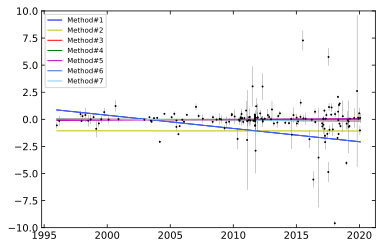

In [17]:
# Plot outputs
plt.errorbar(coordts["mjy"], coordts["dra"], yerr=coordts["ra_err"], 
             color="black", ms=2, fmt=".", elinewidth=0.2)
plt.plot(coordts["mjy"], dra1, color="b", linewidth=1, label="Method#1")
plt.plot(coordts["mjy"], dra2, color="y", linewidth=1, label="Method#2")
plt.plot(coordts["mjy"], dra3, color="r", linewidth=1, label="Method#3")
plt.plot(coordts["mjy"], dra4, color="g", linewidth=1, label="Method#4")
plt.plot(coordts["mjy"], dra5, color="m", linewidth=1, label="Method#5")
plt.plot(coordts["mjy"], dra6, color="royalblue", linewidth=1, label="Method#6")
plt.plot(coordts["mjy"], dra7, color="skyblue", linewidth=1, label="Method#7")

plt.legend(fontsize="x-small")
plt.ylim([-10, 10])

# 2. statistics of the time series

In [21]:
X_a = coordts["dra"] / coordts["ra_err"]
X_d = coordts["ddec"] / coordts["dec_err"]

In [22]:
coordts1 = coordts[((X_a <= 10) & (coordts["dra"] < 10))]
coordts2 = coordts[((X_d <= 10) & (coordts["ddec"] < 10))]